# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly
from plotly.offline import plot
import plotly.express as px
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
ds_illia = dataset[mask].copy()

#Quitamos las columnas que no vamos a utilizar
ds_illia.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

ds_illia.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
ds_illia['fecha2'] = pd.to_datetime(ds_illia.fecha) + pd.to_timedelta(ds_illia.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_illia.drop(columns=['fecha','hora_fin'], inplace = True)

ds_illia.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
ds_illia.rename(columns = {'fecha2':'fecha'}, inplace = True) 
ds_illia.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
ds_illia.sort_values('fecha', inplace = True)
ds_illia.reset_index(drop=True, inplace = True)
ds_illia

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

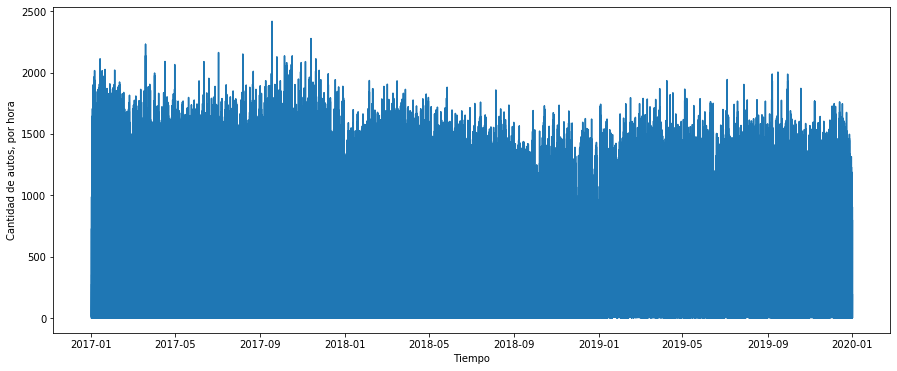

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(ds_illia.fecha, ds_illia.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi lograr una visualización mas amigable
diario_illia = ds_illia.resample('D', on = 'fecha').sum()
diario_illia.reset_index()

fecha  cantidad_pasos
0    2017-01-01           31183
1    2017-01-02           51568
2    2017-01-03           51093
3    2017-01-04           53332
4    2017-01-05           56486
...         ...             ...
1090 2019-12-27           40182
1091 2019-12-28           30681
1092 2019-12-29           26259
1093 2019-12-30           34523
1094 2019-12-31           21447

[1095 rows x 2 columns]

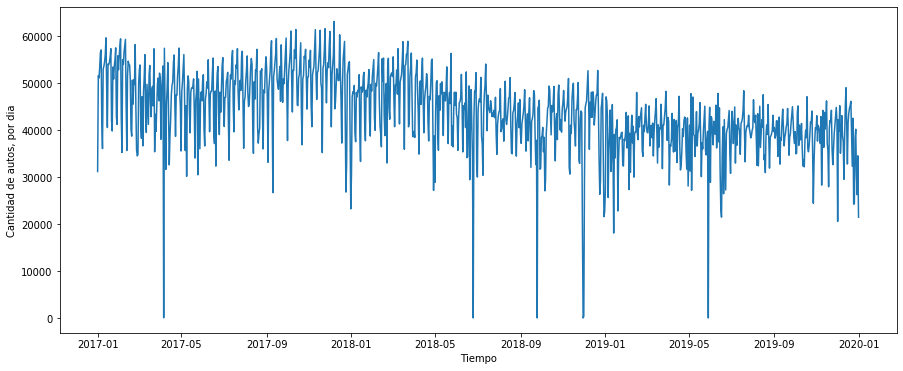

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario_illia.index, diario_illia.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### 2. Análisis Exploratorio de datos

**Para comprender mejor el problema se analiza el data set completo de la estación Illia. A continuación se exponen algunas preguntas para profundizar.**

In [17]:
dataset = dataset.copy()

Nos quedamos con la estacion Illia y se eliminan las columnas 'periodo' y 'hora_inicio'.

In [18]:
mask = (dataset.estacion=='Illia')
ds_illia1 = dataset[mask].copy()

In [19]:
#Quitamos las columnas que no vamos a utilizar
ds_illia1.drop(columns = ['periodo','hora_inicio'], inplace = True)
ds_illia1.head()

fecha  hora_fin     dia estacion    sentido tipo_vehiculo  \
19  2019-01-01         1  Martes    Illia     Centro       Liviano   
20  2019-01-01         1  Martes    Illia     Centro       Liviano   
21  2019-01-01         1  Martes    Illia     Centro        Pesado   
22  2019-01-01         1  Martes    Illia  Provincia       Liviano   
23  2019-01-01         1  Martes    Illia  Provincia       Liviano   

    forma_pago  cantidad_pasos  
19  NO COBRADO             146  
20    TELEPASE              59  
21    TELEPASE               1  
22  NO COBRADO             147  
23    TELEPASE             106

**Agregamos nuevas features al data set completo.**

In [20]:
ds_illia1['fecha2'] = pd.to_datetime(ds_illia1.fecha)
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_illia1.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2  fecha
ds_illia1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
ds_illia1.head()

dia estacion    sentido tipo_vehiculo  forma_pago  cantidad_pasos  \
19  Martes    Illia     Centro       Liviano  NO COBRADO             146   
20  Martes    Illia     Centro       Liviano    TELEPASE              59   
21  Martes    Illia     Centro        Pesado    TELEPASE               1   
22  Martes    Illia  Provincia       Liviano  NO COBRADO             147   
23  Martes    Illia  Provincia       Liviano    TELEPASE             106   

        fecha  
19 2019-01-01  
20 2019-01-01  
21 2019-01-01  
22 2019-01-01  
23 2019-01-01

In [21]:
ds_illia1['dia_num'] = ds_illia1['fecha'].dt.dayofweek
ds_illia1['trimestre'] = ds_illia1['fecha'].dt.quarter
ds_illia1['mes'] = ds_illia1['fecha'].dt.month
ds_illia1['año'] = ds_illia1['fecha'].dt.year
ds_illia1['dia_año'] = ds_illia1['fecha'].dt.dayofyear
ds_illia1['dia_mes'] = ds_illia1['fecha'].dt.day
ds_illia1['num_sem'] = ds_illia1['fecha'].dt.weekofyear
ds_illia1

<ipython-input-21-871968acd50a>:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



dia estacion    sentido tipo_vehiculo  forma_pago  \
19        Martes    Illia     Centro       Liviano  NO COBRADO   
20        Martes    Illia     Centro       Liviano    TELEPASE   
21        Martes    Illia     Centro        Pesado    TELEPASE   
22        Martes    Illia  Provincia       Liviano  NO COBRADO   
23        Martes    Illia  Provincia       Liviano    TELEPASE   
...          ...      ...        ...           ...         ...   
1372324  Domingo    Illia  Provincia        Pesado    EFECTIVO   
1372325  Domingo    Illia  Provincia        Pesado    TELEPASE   
1372326  Domingo    Illia  Provincia        Pesado    EFECTIVO   
1372327  Domingo    Illia  Provincia       Liviano  NO COBRADO   
1372328  Domingo    Illia  Provincia       Liviano    TELEPASE   

         cantidad_pasos      fecha  dia_num  trimestre  mes   año  dia_año  \
19                  146 2019-01-01        1          1    1  2019        1   
20                   59 2019-01-01        1          1    1  2019        1   
21                    1 2019-01-01        1          1    1  2019        1   
22                  147 2019-01-01        1          1    1  2019        1   
23                  106 2019-01-01        1          1    1  2019        1   
...                 ...        ...      ...        ...  ...   ...      ...   
1372324               1 2017-12-31        6          4   12  2017      365   
1372325               2 2017-12-31        6          4   12  2017      365   
1372326               1 2017-12-31        6          4   12  2017      365   
1372327              99 2017-12-31        6          4   12  2017      365   
1372328              25 2017-12-31        6          4   12  2017      365   

         dia_mes  num_sem  
19             1        1  
20             1        1  
21             1        1  
22             1        1  
23             1        1  
...          ...      ...  
1372324       31       52  
1372325       31       52  
1372326       31       52  
1372327       31       52  
1372328       31       52  

[752552 rows x 14 columns]

**¿Cuál es la distribución de los pasos segun el medio de pago en la estación Illia?**

Para poder visualizar con mayor claridad la información se agrupa por mes y año sumando la cantidad de pasos para cada registro.

In [22]:
año = ds_illia1.fecha.dt.year
mes = ds_illia1.fecha.dt.month

año_mes = pd.DataFrame({'year': año,'month': mes,'day': np.ones(len(año))})
año_mes = pd.to_datetime(año_mes)
#año_mes
ds_illia1['año_mes'] = año_mes

In [23]:
fp_Illia = ds_illia1.groupby(['año_mes','forma_pago']).agg({'cantidad_pasos': np.sum }).reset_index()
fp_Illia

año_mes       forma_pago  cantidad_pasos
0   2017-01-01         EFECTIVO         1565260
1   2017-01-01           EXENTO           18528
2   2017-01-01       INFRACCION            4599
3   2017-01-01         MONEDERO              16
4   2017-01-01       NO COBRADO           18924
..         ...              ...             ...
212 2019-12-01           EXENTO           12157
213 2019-12-01       INFRACCION           14840
214 2019-12-01       NO COBRADO           62609
215 2019-12-01  T. DISCAPACIDAD            9125
216 2019-12-01         TELEPASE         1528226

[217 rows x 3 columns]

**Graficamos**

Text(0.5, 1.0, 'Distribución de pasos segun el medio de pago')

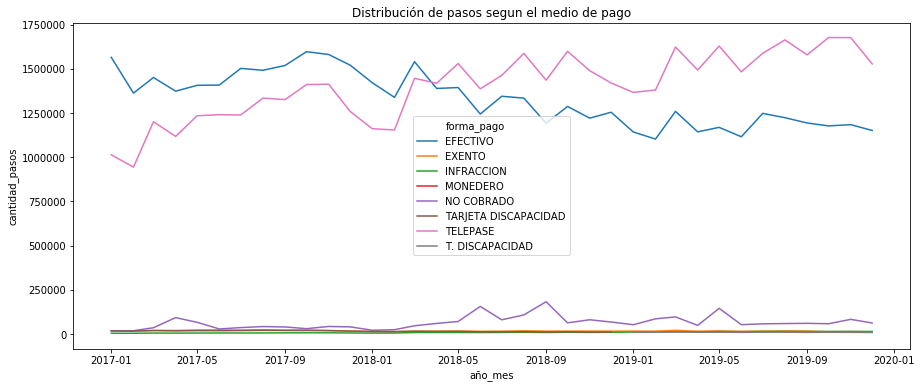

In [24]:
plt.figure(figsize = (15,6))
sns.lineplot(data = fp_Illia, x='año_mes', y= 'cantidad_pasos', hue = 'forma_pago')
plt.title('Distribución de pasos segun el medio de pago')

In [25]:
#el grafico en plotly permite ver exactamente le periodo en el que las lineas cruzan y es posible tener una fecha mas exacta para encontrar la justificación.
import plotly.express as px
fig = px.line(fp_Illia, x='año_mes', y= 'cantidad_pasos', color='forma_pago')
fig.show()

Se visualiza que el medio de pago "efectivo" disminuye a partir del mes de marzo del 2018 y aumenta al mismo ritmo "Telepase". Este cambio puede deberse a que en ese periodo aumento el precio del peaje en un 13,4% sobre autopistas 25 de Mayo, Perito Moreno e Illia y la empresa de peaje ofrecia un 15% de descuento para quienes abonen con "Telepase".

Fuente: https://www.infobae.com/sociedad/2018/03/28/nuevo-aumento-en-los-peajes-portenos-la-tarifa-llegara-a-63-pesos-en-hora-pico/

**¿Cuál es la distribución de pasos por día de semana?**

In [26]:
pasos_sem = ds_illia1.groupby(['fecha', 'dia_num']).agg({'cantidad_pasos': np.sum }).reset_index()
pasos_sem

fecha  dia_num  cantidad_pasos
0    2017-01-01        6           45478
1    2017-01-02        0           89289
2    2017-01-03        1           92602
3    2017-01-04        2           95813
4    2017-01-05        3          100044
...         ...      ...             ...
1090 2019-12-27        4          101501
1091 2019-12-28        5           60999
1092 2019-12-29        6           50185
1093 2019-12-30        0           84043
1094 2019-12-31        1           43010

[1095 rows x 3 columns]

Text(0.5, 1.0, 'Cantidad de pasos por dia de semana')

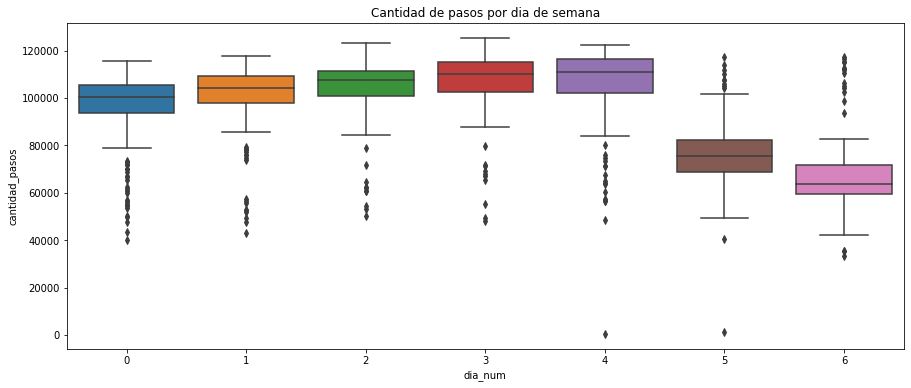

In [27]:
#grafico cantidad de pasos por dia de semana
plt.figure(figsize = (15,6))
sns.boxplot(x = 'dia_num', y ='cantidad_pasos', data = pasos_sem)
plt.title('Cantidad de pasos por dia de semana')

Como se puede observar los días de mayor tráfico en la autopista Illia se da el jueves y viernes, luego el fin de semana se reduce.

**¿Cuál es la distribución por sentido por año?**

In [28]:
pasos_sentido = ds_illia1.groupby(['fecha', 'sentido', 'año']).agg({'cantidad_pasos': np.sum }).reset_index()
pasos_sentido

fecha    sentido   año  cantidad_pasos
0    2017-01-01     Centro  2017           25393
1    2017-01-01  Provincia  2017           20085
2    2017-01-02     Centro  2017           48286
3    2017-01-02  Provincia  2017           41003
4    2017-01-03     Centro  2017           50276
...         ...        ...   ...             ...
2184 2019-12-29  Provincia  2019           23632
2185 2019-12-30     Centro  2019           45299
2186 2019-12-30  Provincia  2019           38744
2187 2019-12-31     Centro  2019           21542
2188 2019-12-31  Provincia  2019           21468

[2189 rows x 4 columns]

Text(0.5, 1.0, 'Cantidad de pasos por sentido por año')

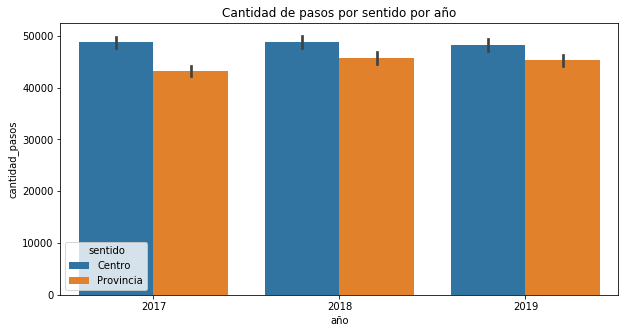

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'año', data = pasos_sentido, y = 'cantidad_pasos', hue = 'sentido')
plt.title('Cantidad de pasos por sentido por año')

Se puede concluir que la cantidad de pasos durante los 3 periodos observados es mayor hacia el sentido del centro.

**¿Cómo se comporta el trafico por mes en Illia? ¿Es similar todos los años?**

In [30]:
mes_illia = ds_illia1.groupby(['mes','año']).agg({'cantidad_pasos': np.sum }).reset_index()

Text(0.5, 1.0, 'Cantidad de pasos por mes por año en Illia')

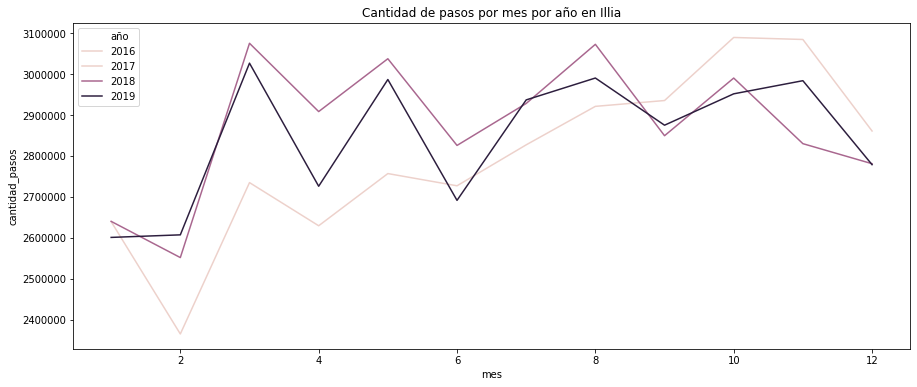

In [31]:
plt.figure(figsize = (15,6))
sns.lineplot(x= 'mes', y='cantidad_pasos', data = mes_illia, hue = 'año')
plt.title('Cantidad de pasos por mes por año en Illia')

Como se visualiza el trafico aumenta a medida que se acerca fin de año, tambien se observa cierta estacionalidad la cual se repite todos los años.

### 3. Data set diario e ingeniería de features

**Para continuar el análisis exploratorio se toma el data set diario de Illia con pago en efectivo con mayor profundidad.**

In [32]:
diario_illia = diario_illia.copy().reset_index()
diario_illia.head()

fecha  cantidad_pasos
0 2017-01-01           31183
1 2017-01-02           51568
2 2017-01-03           51093
3 2017-01-04           53332
4 2017-01-05           56486

**Se incorpora una nueva variable que tiene en cuenta los días feriados, días no laborales y feriados puente con fin turístico. De esta forma el data set tendra identificado estos eventos, que en nuestros país pueden demostrar cambios en el comportamiento de la gente respecto al trafico vehicular.**

Se agrega una columna con días feriados de los 3 años analizados.

In [33]:
feriados = pd.Series(['2017-01-01','2017-02-27','2017-02-28','2017-03-27','2017-04-02','2017-04-13','2017-04-14','2017-05-01','2017-05-25','2017-06-17','2017-06-19','2017-07-09','2017-08-21','2017-10-16','2017-11-20','2017-12-08','2017-12-25',
           '2018-01-01','2018-02-12','2018-02-13','2018-03-24','2018-03-29','2018-03-30','2018-04-02','2018-04-30','2018-05-01','2018-05-25','2018-06-17','2018-06-20','2018-07-09','2018-08-17','2018-10-12','2018-11-20','2018-12-08','2018-12-24','2018-12-25','2018-12-31',
           '2019-01-01','2019-03-04','2019-03-05','2019-03-24','2019-04-02','2019-04-19','2019-05-01','2019-05-25','2019-06-17','2019-06-20','2019-07-08','2019-07-09','2019-08-17','2019-08-19','2019-10-12','2019-10-14','2019-11-18','2019-12-08','2019-12-25'])

In [34]:
print(pd.to_datetime(feriados)) 

0    2017-01-01
1    2017-02-27
2    2017-02-28
3    2017-03-27
4    2017-04-02
5    2017-04-13
6    2017-04-14
7    2017-05-01
8    2017-05-25
9    2017-06-17
10   2017-06-19
11   2017-07-09
12   2017-08-21
13   2017-10-16
14   2017-11-20
15   2017-12-08
16   2017-12-25
17   2018-01-01
18   2018-02-12
19   2018-02-13
20   2018-03-24
21   2018-03-29
22   2018-03-30
23   2018-04-02
24   2018-04-30
25   2018-05-01
26   2018-05-25
27   2018-06-17
28   2018-06-20
29   2018-07-09
30   2018-08-17
31   2018-10-12
32   2018-11-20
33   2018-12-08
34   2018-12-24
35   2018-12-25
36   2018-12-31
37   2019-01-01
38   2019-03-04
39   2019-03-05
40   2019-03-24
41   2019-04-02
42   2019-04-19
43   2019-05-01
44   2019-05-25
45   2019-06-17
46   2019-06-20
47   2019-07-08
48   2019-07-09
49   2019-08-17
50   2019-08-19
51   2019-10-12
52   2019-10-14
53   2019-11-18
54   2019-12-08
55   2019-12-25
dtype: datetime64[ns]


In [35]:
# transformo la lista de feriados en un dataframe
feriados_df = pd.DataFrame({'fecha_feriado': pd.to_datetime(feriados)})

In [36]:
feriados_df

fecha_feriado
0     2017-01-01
1     2017-02-27
2     2017-02-28
3     2017-03-27
4     2017-04-02
5     2017-04-13
6     2017-04-14
7     2017-05-01
8     2017-05-25
9     2017-06-17
10    2017-06-19
11    2017-07-09
12    2017-08-21
13    2017-10-16
14    2017-11-20
15    2017-12-08
16    2017-12-25
17    2018-01-01
18    2018-02-12
19    2018-02-13
20    2018-03-24
21    2018-03-29
22    2018-03-30
23    2018-04-02
24    2018-04-30
25    2018-05-01
26    2018-05-25
27    2018-06-17
28    2018-06-20
29    2018-07-09
30    2018-08-17
31    2018-10-12
32    2018-11-20
33    2018-12-08
34    2018-12-24
35    2018-12-25
36    2018-12-31
37    2019-01-01
38    2019-03-04
39    2019-03-05
40    2019-03-24
41    2019-04-02
42    2019-04-19
43    2019-05-01
44    2019-05-25
45    2019-06-17
46    2019-06-20
47    2019-07-08
48    2019-07-09
49    2019-08-17
50    2019-08-19
51    2019-10-12
52    2019-10-14
53    2019-11-18
54    2019-12-08
55    2019-12-25

In [37]:
# joineamos el dataset original con el dataframe de los feriados
diario_illia = pd.merge(diario_illia,feriados_df, how = 'left' # Importante: hacer un left join
                ,left_on = 'fecha' # si es que "fecha" es el nombre de la columna correspondiente en el dataframe "diario"
                ,right_on = 'fecha_feriado')

In [38]:
diario_illia.head()

fecha  cantidad_pasos fecha_feriado
0 2017-01-01           31183    2017-01-01
1 2017-01-02           51568           NaT
2 2017-01-03           51093           NaT
3 2017-01-04           53332           NaT
4 2017-01-05           56486           NaT

In [39]:
# Ahora el dataframe diario tiene una columna extra que se llama "fecha_feriado"
# Esa columna esta en NULL/NaN si es que es una fecha normal/no feriado. 
# Creamos la columna binaria que nos dice si el dia en cuestion es feriado o no.
diario_illia.loc[diario_illia.fecha_feriado.isna(), 'es_feriado'] = 0
diario_illia.loc[~diario_illia.fecha_feriado.isna(), 'es_feriado'] = 1

In [40]:
# se elimina la columna fecha_feriado porque ya no es necesaria
diario_illia.drop(columns = ['fecha_feriado'], inplace = True)
diario_illia.head()

fecha  cantidad_pasos  es_feriado
0 2017-01-01           31183         1.0
1 2017-01-02           51568         0.0
2 2017-01-03           51093         0.0
3 2017-01-04           53332         0.0
4 2017-01-05           56486         0.0

Se agregan más columnas con datos relevantes de series de tiempo.

In [41]:
#se crean nuevas features
diario_illia['dia_num'] = diario_illia['fecha'].dt.dayofweek
diario_illia['trimestre'] = diario_illia['fecha'].dt.quarter
diario_illia['mes'] = diario_illia['fecha'].dt.month
diario_illia['año'] = diario_illia['fecha'].dt.year
diario_illia['dia_año'] = diario_illia['fecha'].dt.dayofyear
diario_illia['dia_mes'] = diario_illia['fecha'].dt.day
diario_illia['num_sem'] = diario_illia['fecha'].dt.weekofyear
diario_illia

<ipython-input-41-ac96cac20e5b>:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



fecha  cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
0    2017-01-01           31183         1.0        6          1    1  2017   
1    2017-01-02           51568         0.0        0          1    1  2017   
2    2017-01-03           51093         0.0        1          1    1  2017   
3    2017-01-04           53332         0.0        2          1    1  2017   
4    2017-01-05           56486         0.0        3          1    1  2017   
...         ...             ...         ...      ...        ...  ...   ...   
1090 2019-12-27           40182         0.0        4          4   12  2019   
1091 2019-12-28           30681         0.0        5          4   12  2019   
1092 2019-12-29           26259         0.0        6          4   12  2019   
1093 2019-12-30           34523         0.0        0          4   12  2019   
1094 2019-12-31           21447         0.0        1          4   12  2019   

      dia_año  dia_mes  num_sem  
0           1        1       52  
1           2        2        1  
2           3        3        1  
3           4        4        1  
4           5        5        1  
...       ...      ...      ...  
1090      361       27       52  
1091      362       28       52  
1092      363       29       52  
1093      364       30        1  
1094      365       31        1  

[1095 rows x 10 columns]

**¿Cuál es la distribución o comportamiento de pasos por semana?**

Text(0.5, 1.0, 'Cantidad de pasos por dia de semana')

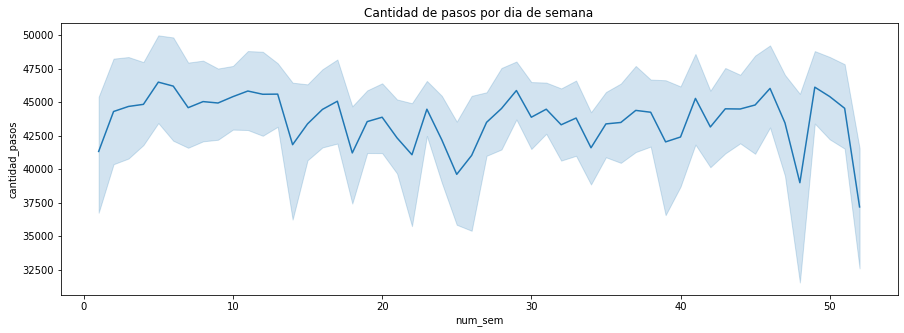

In [42]:
plt.figure(figsize = (15,5))
sns.lineplot(x= 'num_sem', y='cantidad_pasos', data = diario_illia)
plt.title('Cantidad de pasos por dia de semana')

**¿Cuál es la distribución de pasos por mes con el correr de los años?**

In [43]:
#Resampleamos nuestros datos para agrupar por mes, y asi lograr una visualización mas amigable
mensual_illia = ds_illia.resample('M', on = 'fecha').sum()

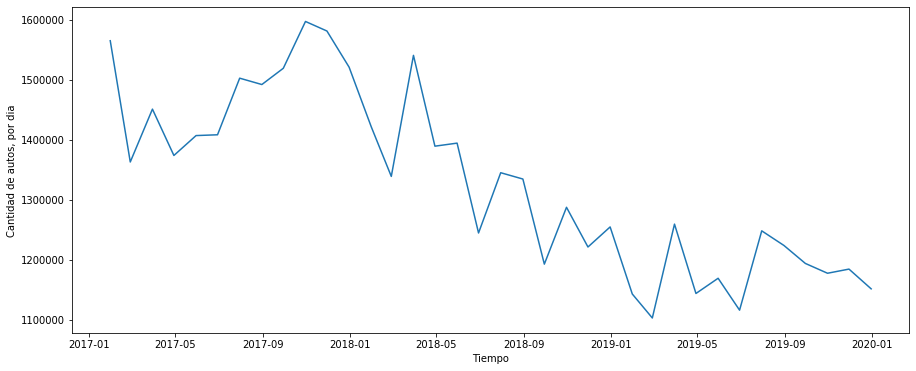

In [44]:
plt.figure(figsize = (15,6))
plt.plot(mensual_illia.index, mensual_illia.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Como se puede ver, la tendencia es a la baja en el trafico con pago efectivo, tal como se comprobó anteriormente.

**¿Cuál es la distribución del tránsito por día del mes?**

Text(0.5, 1.0, 'Cantidad de pasos por dia del mes')

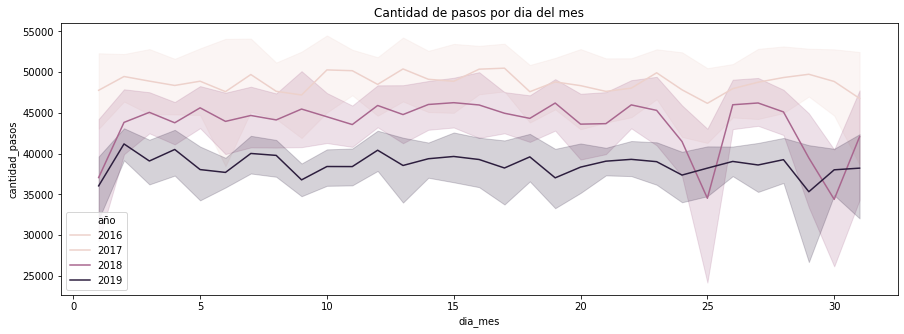

In [45]:
plt.figure(figsize = (15,5))
sns.lineplot(x= 'dia_mes', y='cantidad_pasos', data = diario_illia, hue= 'año')
plt.title('Cantidad de pasos por dia del mes')

Se observa que los primeros 15 días del mes el tráfico es mayor que la segunda quincena donde comienza a disminuir.

### Outliers

Como se pudo observar en la distribución de todas las fechas al comienzo del notebook, hay outliers. Para comprander que paso esos días, los identificamos y se investiga que pudo haber pasado.

**¿Hay datos nulos o vacíos?**

In [46]:
print("Valores faltantes por columnas:\n", pd.isna(diario_illia).sum())

Valores faltantes por columnas:
 fecha             0
cantidad_pasos    0
es_feriado        0
dia_num           0
trimestre         0
mes               0
año               0
dia_año           0
dia_mes           0
num_sem           0
dtype: int64


**¿Hay pasos menores a 400?**

In [47]:
ceros = diario_illia.cantidad_pasos <400
ceros.value_counts()

False    1089
True        6
Name: cantidad_pasos, dtype: int64

**¿Cuáles fechas son esas 6?**

In [48]:
outliers = diario_illia[(diario_illia.cantidad_pasos < 400)].copy()
outliers

fecha  cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
95  2017-04-06              40         0.0        3          2    4  2017   
540 2018-06-25               0         0.0        0          2    6  2018   
632 2018-09-25               0         0.0        1          3    9  2018   
698 2018-11-30               0         0.0        4          4   11  2018   
699 2018-12-01             350         0.0        5          4   12  2018   
878 2019-05-29               0         0.0        2          2    5  2019   

     dia_año  dia_mes  num_sem  
95        96        6       14  
540      176       25       26  
632      268       25       39  
698      334       30       48  
699      335        1       48  
878      149       29       22

Se puede afirmar que los días donde hubieron menos de 400 pasos son 06/04/2017 - Paro Nacional, 25/06/2018 - Paro Nacional, 25/09/2018 - Paro Nacional, 30/11/2018 - Feriado por el G20, 01/12/2018 - Día posterior al G20 y 29/05/2019 - Paro Nacional.

**Al tratarse de paros nacionales, son casos especiales que no son comunes ni frecuentes, por lo que se decide reemplazar esos datos con el valor promedio del mismo día de la semana.**

In [49]:
outliers = outliers.drop(columns= ['es_feriado', 'trimestre', 'mes', 'año', 'dia_año', 'dia_mes', 'num_sem'])
outliers

fecha  cantidad_pasos  dia_num
95  2017-04-06              40        3
540 2018-06-25               0        0
632 2018-09-25               0        1
698 2018-11-30               0        4
699 2018-12-01             350        5
878 2019-05-29               0        2

In [50]:
#agrupamos la cantidad de pasos por día
promedio_dia = diario_illia.groupby('dia_num')['cantidad_pasos'].mean()
promedio_dia = pd.DataFrame(promedio_dia)
promedio_dia.rename(columns = {'cantidad_pasos' : 'pasos_promedio'}, inplace = True)
promedio_dia.reset_index( inplace =True, drop= False)
promedio_dia

dia_num  pasos_promedio
0        0    42620.299363
1        1    43729.624204
2        2    45676.448718
3        3    46808.775641
4        4    49020.974359
5        5    41293.044872
6        6    36891.471338

In [51]:
#unimos los dos dataframe outlier y promedio_dia
outliers = pd.merge(outliers, promedio_dia, on= 'dia_num')
outliers

fecha  cantidad_pasos  dia_num  pasos_promedio
0 2017-04-06              40        3    46808.775641
1 2018-06-25               0        0    42620.299363
2 2018-09-25               0        1    43729.624204
3 2018-11-30               0        4    49020.974359
4 2018-12-01             350        5    41293.044872
5 2019-05-29               0        2    45676.448718

In [52]:
outliers = outliers.drop(columns= ['cantidad_pasos', 'dia_num'])
outliers

fecha  pasos_promedio
0 2017-04-06    46808.775641
1 2018-06-25    42620.299363
2 2018-09-25    43729.624204
3 2018-11-30    49020.974359
4 2018-12-01    41293.044872
5 2019-05-29    45676.448718

In [53]:
#A nuestro data set le agregamos una columna del ds outliers teniendo en cuenta como indice la fecha
diario_illia = pd.merge(diario_illia, outliers, how = 'left', left_on = 'fecha', right_on = 'fecha')
diario_illia

fecha  cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
0    2017-01-01           31183         1.0        6          1    1  2017   
1    2017-01-02           51568         0.0        0          1    1  2017   
2    2017-01-03           51093         0.0        1          1    1  2017   
3    2017-01-04           53332         0.0        2          1    1  2017   
4    2017-01-05           56486         0.0        3          1    1  2017   
...         ...             ...         ...      ...        ...  ...   ...   
1090 2019-12-27           40182         0.0        4          4   12  2019   
1091 2019-12-28           30681         0.0        5          4   12  2019   
1092 2019-12-29           26259         0.0        6          4   12  2019   
1093 2019-12-30           34523         0.0        0          4   12  2019   
1094 2019-12-31           21447         0.0        1          4   12  2019   

      dia_año  dia_mes  num_sem  pasos_promedio  
0           1        1       52             NaN  
1           2        2        1             NaN  
2           3        3        1             NaN  
3           4        4        1             NaN  
4           5        5        1             NaN  
...       ...      ...      ...             ...  
1090      361       27       52             NaN  
1091      362       28       52             NaN  
1092      363       29       52             NaN  
1093      364       30        1             NaN  
1094      365       31        1             NaN  

[1095 rows x 11 columns]

In [54]:
#Rellenamos los campos vacios (outliers) de la columna cantidad de pasos con el dato de la columna pasos_promedio
diario_illia.loc[~diario_illia.pasos_promedio.isna(),'cantidad_pasos'] = diario_illia[~diario_illia.pasos_promedio.isna()].pasos_promedio
diario_illia

fecha  cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
0    2017-01-01         31183.0         1.0        6          1    1  2017   
1    2017-01-02         51568.0         0.0        0          1    1  2017   
2    2017-01-03         51093.0         0.0        1          1    1  2017   
3    2017-01-04         53332.0         0.0        2          1    1  2017   
4    2017-01-05         56486.0         0.0        3          1    1  2017   
...         ...             ...         ...      ...        ...  ...   ...   
1090 2019-12-27         40182.0         0.0        4          4   12  2019   
1091 2019-12-28         30681.0         0.0        5          4   12  2019   
1092 2019-12-29         26259.0         0.0        6          4   12  2019   
1093 2019-12-30         34523.0         0.0        0          4   12  2019   
1094 2019-12-31         21447.0         0.0        1          4   12  2019   

      dia_año  dia_mes  num_sem  pasos_promedio  
0           1        1       52             NaN  
1           2        2        1             NaN  
2           3        3        1             NaN  
3           4        4        1             NaN  
4           5        5        1             NaN  
...       ...      ...      ...             ...  
1090      361       27       52             NaN  
1091      362       28       52             NaN  
1092      363       29       52             NaN  
1093      364       30        1             NaN  
1094      365       31        1             NaN  

[1095 rows x 11 columns]

In [55]:
#luego eliminamos pasos_promedio porque ya no es necesaria
diario_illia = diario_illia.drop(columns= ['pasos_promedio'])

Graficamos para visualizar la serie sin los outliers.

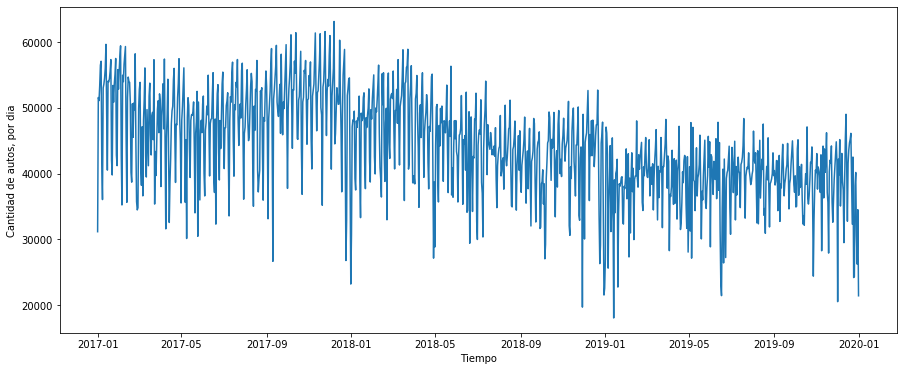

In [56]:
plt.figure(figsize = (15,6))
plt.plot(diario_illia.fecha, diario_illia.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### 4. Componentes estacionales y tendencia de la serie

In [57]:
diario_illia.head(3)

fecha  cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
0 2017-01-01         31183.0         1.0        6          1    1  2017   
1 2017-01-02         51568.0         0.0        0          1    1  2017   
2 2017-01-03         51093.0         0.0        1          1    1  2017   

   dia_año  dia_mes  num_sem  
0        1        1       52  
1        2        2        1  
2        3        3        1

In [58]:
diario_illia.set_index('fecha', inplace = True)

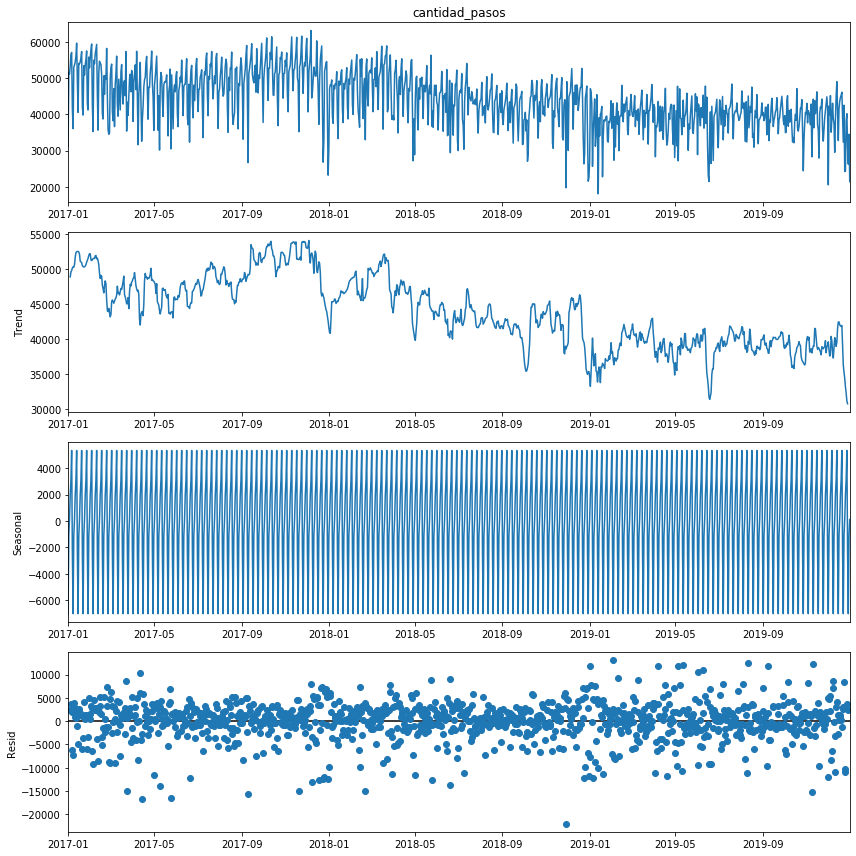

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
result = seasonal_decompose(diario_illia.cantidad_pasos, model='additive')

matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Como se puede confirmar hay una tendencia a la baja de la cantidad de pasos en efectivo (la gente esta migrando al pago con telepase), tambien se visualiza estacionalidad, que segun lo que analizamos se repite semanalmente. Los residuos aparentan aumentar a medida que avanza el tiempo.

### 5. Predicción - Modelos de Machine Learning

*Para medir el error en los modelos elegimos el el error cuadrático medio (RMSE) ya que mide la cantidad de error que hay entre dos conjuntos de datos y facilita la interpretación porque utiliza las mimsmas unidades de los datos analizados.*


**Modelo Benchmark**

Se comienza con el modelo bench generando un shift de 7 días (One Step) sencillo para ver un desempeño pre eliminar al predecir.

In [60]:
from sklearn.metrics import  mean_squared_error

In [61]:
diario_illia['shift_7'] = diario_illia.cantidad_pasos.shift(periods = 7)
diario_illia.head(15)

cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
fecha                                                                   
2017-01-01         31183.0         1.0        6          1    1  2017   
2017-01-02         51568.0         0.0        0          1    1  2017   
2017-01-03         51093.0         0.0        1          1    1  2017   
2017-01-04         53332.0         0.0        2          1    1  2017   
2017-01-05         56486.0         0.0        3          1    1  2017   
2017-01-06         57081.0         0.0        4          1    1  2017   
2017-01-07         41587.0         0.0        5          1    1  2017   
2017-01-08         36065.0         0.0        6          1    1  2017   
2017-01-09         53036.0         0.0        0          1    1  2017   
2017-01-10         53601.0         0.0        1          1    1  2017   
2017-01-11         54523.0         0.0        2          1    1  2017   
2017-01-12         56042.0         0.0        3          1    1  2017   
2017-01-13         59651.0         0.0        4          1    1  2017   
2017-01-14         49014.0         0.0        5          1    1  2017   
2017-01-15         40546.0         0.0        6          1    1  2017   

            dia_año  dia_mes  num_sem  shift_7  
fecha                                           
2017-01-01        1        1       52      NaN  
2017-01-02        2        2        1      NaN  
2017-01-03        3        3        1      NaN  
2017-01-04        4        4        1      NaN  
2017-01-05        5        5        1      NaN  
2017-01-06        6        6        1      NaN  
2017-01-07        7        7        1      NaN  
2017-01-08        8        8        1  31183.0  
2017-01-09        9        9        2  51568.0  
2017-01-10       10       10        2  51093.0  
2017-01-11       11       11        2  53332.0  
2017-01-12       12       12        2  56486.0  
2017-01-13       13       13        2  57081.0  
2017-01-14       14       14        2  41587.0  
2017-01-15       15       15        2  36065.0

In [62]:
#Se elije el ultimo trimestre de 2019 segun la consigna para predecir.
diario_illia['2019-10':'2019-12'].head()

cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
fecha                                                                   
2019-10-01         39669.0         0.0        1          4   10  2019   
2019-10-02         34943.0         0.0        2          4   10  2019   
2019-10-03         35054.0         0.0        3          4   10  2019   
2019-10-04         43775.0         0.0        4          4   10  2019   
2019-10-05         45150.0         0.0        5          4   10  2019   

            dia_año  dia_mes  num_sem  shift_7  
fecha                                           
2019-10-01      274        1       40  39191.0  
2019-10-02      275        2       40  41486.0  
2019-10-03      276        3       40  43110.0  
2019-10-04      277        4       40  44985.0  
2019-10-05      278        5       40  41925.0

In [63]:
#Revisamos cuantos días hay en ese periodo
diario_illia['2019-10':'2019-12'].shape #92 dias

(92, 10)

In [64]:
#Verificamos el error a traves de RMSE.
rmse_bench = np.sqrt(mean_squared_error(diario_illia['2019-10':'2019-12'].cantidad_pasos, diario_illia['2019-10':'2019-12'].shift_7))
rmse_bench

6949.663393475162

Graficamos para mayor comprensión.

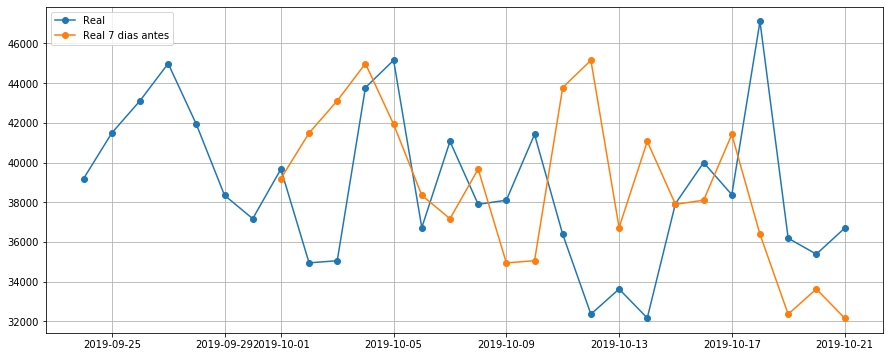

In [65]:
plt.figure(figsize = (15,6))
plt.plot(diario_illia['2019-09-24':'2019-10-21'].index, diario_illia['2019-09-24':'2019-10-21'].cantidad_pasos, '-o', label = 'Real')

plt.plot(diario_illia['2019-10-01':'2019-10-21'].index, diario_illia['2019-10-01':'2019-10-21'].shift_7, '-o', label = 'Real 7 dias antes')
plt.legend()
plt.grid()

**Modelo de Regresión Lineal**

In [66]:
diario_illia_lr = diario_illia.copy()
diario_illia_lr.head()

cantidad_pasos  es_feriado  dia_num  trimestre  mes   año  \
fecha                                                                   
2017-01-01         31183.0         1.0        6          1    1  2017   
2017-01-02         51568.0         0.0        0          1    1  2017   
2017-01-03         51093.0         0.0        1          1    1  2017   
2017-01-04         53332.0         0.0        2          1    1  2017   
2017-01-05         56486.0         0.0        3          1    1  2017   

            dia_año  dia_mes  num_sem  shift_7  
fecha                                           
2017-01-01        1        1       52      NaN  
2017-01-02        2        2        1      NaN  
2017-01-03        3        3        1      NaN  
2017-01-04        4        4        1      NaN  
2017-01-05        5        5        1      NaN

In [67]:
#Particionamos el ds en train y test.
diario_illia_lr['fecha_numeros'] = diario_illia_lr.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train_lr = diario_illia_lr.loc[diario_illia_lr.index <= split_date].copy()
test_lr  = diario_illia_lr.loc[diario_illia_lr.index >  split_date].copy()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_lr.fecha_numeros.values.reshape(-1, 1), train_lr.cantidad_pasos)

LinearRegression()

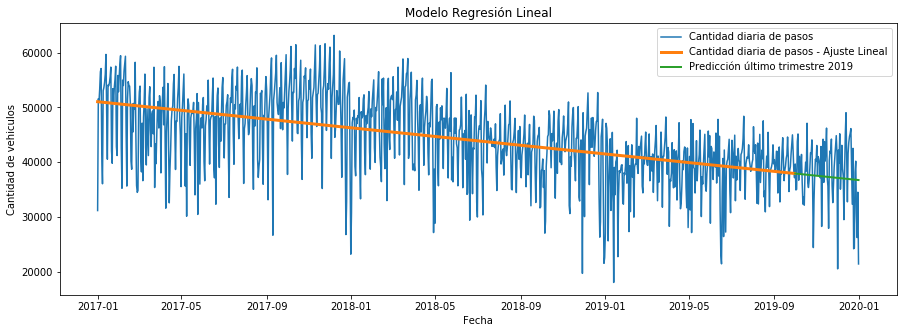

In [68]:
#Graficamos los datos originales, la regresión lineal y la prediccón.
plt.figure(figsize = (15,5))
plt.plot(diario_illia_lr.index, diario_illia_lr.cantidad_pasos, label = 'Cantidad diaria de pasos')
plt.plot(train_lr.index, lr.predict(train_lr.fecha_numeros.values.reshape(-1, 1)), lw = 3, label = 'Cantidad diaria de pasos - Ajuste Lineal')
plt.plot(test_lr.index,  lr.predict(test_lr.fecha_numeros.values.reshape(-1, 1)),  lw = 2, label = 'Predicción último trimestre 2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo Regresión Lineal")
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(test_lr.cantidad_pasos, lr.predict(test_lr.fecha_numeros.values.reshape(-1, 1))))

print(rmse_lr)

5804.138095751136


Este último modelo muestra un error mas óptimo que el modelo benchmark.

Se investigó modelos exclusivos de series de tiempo como son ARIMA y SARIMA, estos no se exploraron en el material de estudio pero consideramos oportuno probarlos.

**Modelo ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)**

ARIMA es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

In [70]:
diario_illia_A = diario_illia.drop(columns= ['shift_7', 'es_feriado', 'dia_num', 'trimestre', 'mes','año','dia_año', 'dia_mes', 'num_sem'])
#diario_illia_A = diario_illia_A.copy().reset_index()
diario_illia_A

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         21447.0

[1095 rows x 1 columns]

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

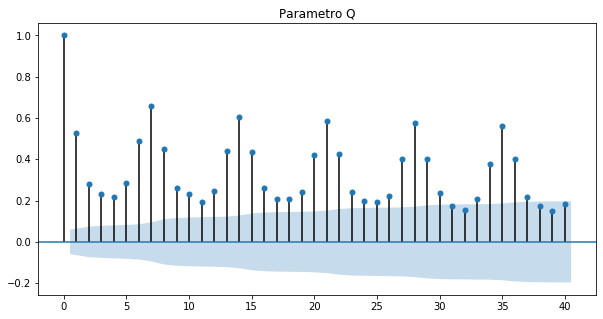

In [72]:
#plot acf para identificar el parametro Q
#Arima (p,d,q)
N, M = 10, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(diario_illia_A, lags = 40, title='Parametro Q', ax=ax)
plt.show()

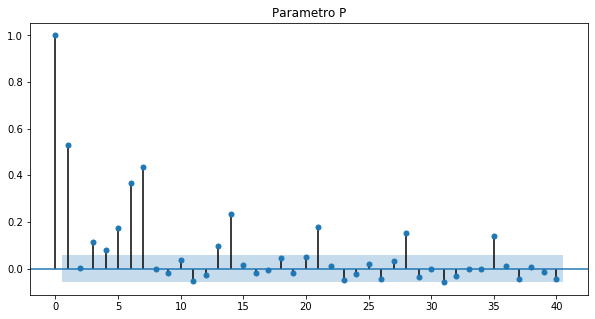

In [73]:
#plot acf para identificar el parametro P
#Arima (p,d,q)
N, M = 10, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(diario_illia_A, lags = 40, title='Parametro P', ax=ax)
plt.show()

In [74]:
#separamos el dataset de testeo y entrenamiento
arima_train = diario_illia_A.loc['2017-01-01':'2019-09-30']
arima_test = diario_illia_A.loc['2019-10-01':'2019-12-31']

In [75]:
arima_train.size

1003

In [76]:
arima_test.size

92

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
# p = 1  d = 0  q = 29,30

In [79]:
arima_model = ARIMA(arima_train, order = (1,0,1))

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [80]:
arima_model_fit = arima_model.fit()

In [81]:
arima_model_fit.aic

20423.459530636086

In [82]:
arima_forescast = arima_model_fit.forecast(steps = 92)[0]

In [83]:
#Se calcula RMSE para el modelo
rmse_arima = np.sqrt(mean_squared_error(arima_test, arima_forescast))
rmse_arima

8491.237069904852

Este modelo no presenta mejores resultados en términos de RMSE que los anteriores.

**Modelo SARIMAX**

Los modelos SARIMA, se utilizan ampliamente con datos de series temporales estacionales lo cual implica que presenta patrones de comportamientos similares a través
del tiempo. Revisando el análisis anterior podemos inferir que dicho modelo puede brindar mejores resultados por la temporalidad presentada. Se procede a su ejecución para verificarlo.

En principio, se utilizará el valor 1 en todos los coeficientes del modelo solo para probar su performance (excepto el valor S que será igual a 7, ya que se considerará la estacionalidad de una semana). En una segunda etapa, se realizará una optimización de hiperparámetros para obtener el mejor resultado posible.

In [84]:
diario_illia_S = diario_illia.drop(columns= ['shift_7', 'es_feriado', 'dia_num', 'trimestre', 'mes','año','dia_año', 'dia_mes', 'num_sem'])
diario_illia_S

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         21447.0

[1095 rows x 1 columns]

In [85]:
diario_illia_S['fecha_numeros'] = diario_illia_S.index.map(datetime.datetime.toordinal)

In [86]:
#Particionamos el ds en train y test.
split_date = '2019-09-30'

sarimax_train = diario_illia_S.loc[diario_illia_S.index <= split_date].copy()
sarimax_test  = diario_illia_S.loc[diario_illia_S.index >  split_date].copy()

sarimax_train.drop(columns = ["fecha_numeros"], inplace = True)

In [87]:
#Realizamos la predicción con el modelo SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
#import statsmodels.api as sm

sarimax_model = SARIMAX(sarimax_train, order = (1,1,1), seasonal_order = (1,1,1,7))

sarimax_model_fit = sarimax_model.fit()

sarimax_forescast = sarimax_model_fit.forecast(steps = 92)
sarimax_forescast

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2019-10-01    40168.882712
2019-10-02    41735.739131
2019-10-03    42351.636555
2019-10-04    44337.424229
2019-10-05    39851.053706
                  ...     
2019-12-27    44837.347606
2019-12-28    40232.918381
2019-12-29    37663.579480
2019-12-30    39685.729598
2019-12-31    41176.276759
Freq: D, Length: 92, dtype: float64

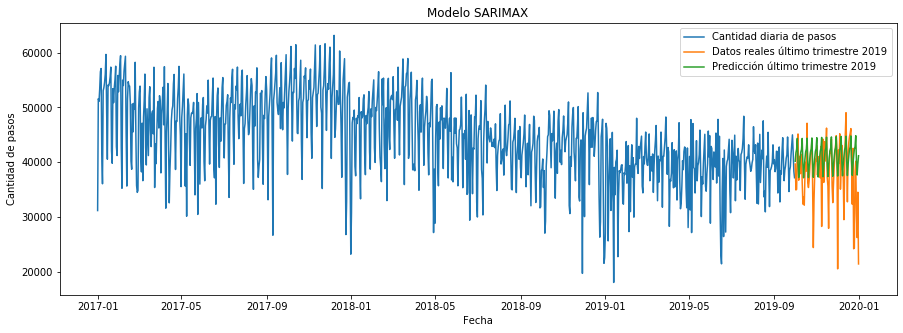

In [88]:
# Grafico de la predicción SARIMAX

plt.figure(figsize = (15,5))
plt.plot(sarimax_train.index, sarimax_train.cantidad_pasos, label = 'Cantidad diaria de pasos')
plt.plot(sarimax_test.index, sarimax_test.cantidad_pasos,  label = 'Datos reales último trimestre 2019')
plt.plot(sarimax_test.index,  sarimax_forescast, label = 'Predicción último trimestre 2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.title("Modelo SARIMAX")
plt.show()

In [89]:
# Calculo de RMSE de SARIMAX
from sklearn.metrics import mean_squared_error
rmse_sarimax = np.sqrt(mean_squared_error(sarimax_test.cantidad_pasos, sarimax_forescast))
rmse_sarimax

5882.02193399865

Se puede observar que el error se redujo considerablemente, supera a los modelos bench y Linea de regresion.
Ahora se hara una optimizacion de los hiperparámetros para ver si los resultados mejoran la performance mas aún.

In [90]:
#Grid Search de SARIMAX

import time
start = time.time()

import itertools

p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

p2 = d2 = q2 = range(0, 3)
pdq2 = list(itertools.product(p2,d2,q2))

s = 7

pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]

combs = {}
rmse = []

for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            sarimax_model_op = SARIMAX(sarimax_train, order=combination, seasonal_order=seasonal_combination)
            sarimax_model_fit_op = sarimax_model_op.fit()
            sarimax_forescast_op = sarimax_model_fit_op.forecast(steps = 92)
            combs.update({np.sqrt(mean_squared_error(sarimax_test.cantidad_pasos, sarimax_forescast_op)) : [combination, seasonal_combination]})
            rmse.append(np.sqrt(mean_squared_error(sarimax_test.cantidad_pasos, sarimax_forescast_op)))
            
        except:
            continue
            
end = time.time()
process_time = end - start

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Minicond

In [91]:
# Tiempo de procesamiento del Grid Search
print('Tiempo de Procesamiento del Grid Search: %.1f' % process_time)

Tiempo de Procesamiento del Grid Search: 2811.9


In [92]:
#Mejores hiperparámetros
best_rmse = min(rmse)
combs[best_rmse]

[(0, 1, 0), (0, 1, 2, 7)]

**Modelo SARIMAX Optimizado**

In [93]:
diario_illia_Sop = diario_illia.drop(columns= ['shift_7', 'es_feriado', 'dia_num', 'trimestre', 'mes','año','dia_año', 'dia_mes', 'num_sem'])
diario_illia_Sop['fecha_numeros'] = diario_illia_Sop.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

sarimax_train_op = diario_illia_Sop.loc[diario_illia_Sop.index <= split_date].copy()
sarimax_test_op = diario_illia_Sop.loc[diario_illia_Sop.index >  split_date].copy()

sarimax_train_op.drop(columns = ["fecha_numeros"], inplace = True)

sarimax_model_op = SARIMAX(sarimax_train_op, order = (0,1,0), seasonal_order = (0,1,2,7))

sarimax_model_op = sarimax_model_op.fit()

sarimax_forescast_op = sarimax_model_op.forecast(steps = 92)
sarimax_forescast_op

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2019-10-01    38533.490402
2019-10-02    39815.848213
2019-10-03    40375.428498
2019-10-04    42384.576020
2019-10-05    37699.471652
                  ...     
2019-12-27    41557.955741
2019-12-28    36780.789255
2019-12-29    34139.182173
2019-12-30    36357.747267
2019-12-31    37759.123487
Freq: D, Length: 92, dtype: float64

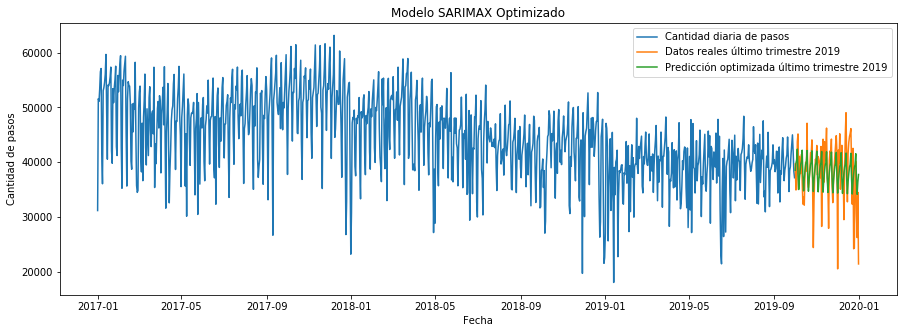

In [94]:
#Graficamos
plt.figure(figsize = (15,5))
plt.plot(sarimax_train_op.index, sarimax_train_op.cantidad_pasos, label = 'Cantidad diaria de pasos')
plt.plot(sarimax_test_op.index,  sarimax_test_op.cantidad_pasos,  label = 'Datos reales último trimestre 2019')
plt.plot(sarimax_test_op.index,  sarimax_forescast_op, label = 'Predicción optimizada último trimestre 2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.title("Modelo SARIMAX Optimizado")
plt.show()

In [95]:
#Calculo RMSE de SARIMAX Optimizado
from sklearn.metrics import mean_squared_error
rmse_sarimax_op = np.sqrt(mean_squared_error(sarimax_test_op.cantidad_pasos, sarimax_forescast_op))
rmse_sarimax_op

5139.247056720088

Los resultados de la optimización de hiperparámetros mejoró la performance del modelo, logrando el mínimo RMSE de los modelos evaluados. Creo que es posible mejorar este valor agregando mas hiperparámetros.

La consigna propone probar el modelo creado para predecir el tráfico del año 2020. Seguramente el modelo falle ya que el año 2020 estuvo influenciado por un evento inesperado, como fue la pandemia de COVID19. De igual modo lo probaremos.

In [96]:
#Revisamos que el DS 2020 tenga las variables que necesitamos
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [97]:
#Como los valores de la columna periodo y cantidad de pasos es de tipo float la vamos a convertir en entero.
data_2020.periodo = data_2020.periodo.astype(int)
data_2020.cantidad_pasos = data_2020.cantidad_pasos.astype(int)
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0     2020  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1     2020  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2     2020  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3     2020  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4     2020  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro              24  
1                          Efectivo  Provincia              80  
2                Paso en Infracción  Provincia               1  
3  Paso en infracción con Multa LPR     Centro               1  
4  Paso en infracción con Multa LPR  Provincia               1

In [98]:
#Como la estación en análisis es Illia y la forma de pago es efectivo, verificamos que los datos traigan información
print(data_2020['estacion'].unique())
print(data_2020['forma_pago'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [99]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
ds_2020 = data_2020[mask].copy()

In [100]:
#Eliminamos las columnas que no usaremos
ds_2020.drop(columns = ['periodo', 'dia_fecha', 'hora_inicio', 'hora_fin', 'observacion'], inplace = True)
ds_2020.head()

fecha    mes        dia estacion tipo_vehiculo forma_pago  \
52   2020-01-01 00:00:00  enero  Miércoles    ILLIA          Auto   Efectivo   
53   2020-01-01 00:00:00  enero  Miércoles    ILLIA          Auto   Efectivo   
134  2020-01-01 00:00:00  enero  Miércoles    ILLIA          Auto   Efectivo   
135  2020-01-01 00:00:00  enero  Miércoles    ILLIA          Auto   Efectivo   
202  2020-01-01 00:00:00  enero  Miércoles    ILLIA          Auto   Efectivo   

       sentido  cantidad_pasos  
52      Centro             326  
53   Provincia             319  
134     Centro             199  
135  Provincia             180  
202     Centro             114

In [101]:
#Resampleamos para agrupar por día los datos 2020
ds_2020['fecha2'] = pd.to_datetime(data_2020.fecha)
ds_2020.drop(columns = ['fecha'], inplace = True)
ds_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 

diario_2020 = ds_2020.resample('D', on = 'fecha').sum()
diario_2020

cantidad_pasos
fecha                     
2020-01-01           21395
2020-01-02           33722
2020-01-03           37067
2020-01-04           30627
2020-01-05           27812
...                    ...
2020-12-27            8434
2020-12-28           10311
2020-12-29           12036
2020-12-30           12527
2020-12-31            6553

[366 rows x 1 columns]

In [102]:
#Ya listo el ds 2020 procedemos a armar el del 2017-18-19.
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
ds_171819 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(ds_171819.estacion=='Illia', ds_171819.forma_pago == 'EFECTIVO')
ds_171819 = ds_171819[mask].copy()

#Quitamos las columnas que no vamos a utilizar
ds_171819.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion', 'hora_fin'], inplace = True)
ds_171819.head()

fecha     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01  Martes     Centro       Liviano             537
86   2019-01-01  Martes     Centro        Pesado               1
88   2019-01-01  Martes  Provincia       Liviano             443
94   2019-01-01  Martes  Provincia        Pesado               1
149  2019-01-01  Martes     Centro       Liviano             769

In [103]:
#Pasamos la columna fecha a formato datetime
ds_171819['fecha2'] = pd.to_datetime(ds_171819.fecha)

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_171819.drop(columns=['fecha'], inplace = True)
ds_171819.rename(columns = {'fecha2':'fecha'}, inplace = True) 
ds_171819.head()

dia    sentido tipo_vehiculo  cantidad_pasos      fecha
80   Martes     Centro       Liviano             537 2019-01-01
86   Martes     Centro        Pesado               1 2019-01-01
88   Martes  Provincia       Liviano             443 2019-01-01
94   Martes  Provincia        Pesado               1 2019-01-01
149  Martes     Centro       Liviano             769 2019-01-01

In [104]:
#Resampleo diario
diario_171819 = ds_171819.resample('D', on = 'fecha').sum()

In [105]:
#Concatenamos los 4 ds
diario_total = pd.concat([diario_171819, diario_2020])
diario_total

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2020-12-27            8434
2020-12-28           10311
2020-12-29           12036
2020-12-30           12527
2020-12-31            6553

[1461 rows x 1 columns]

**Modelo SARIMAX Optimizado - Predicción tráfico 2020** 

In [106]:
#Separamos el dataset
diario_total['fecha_numeros'] = diario_total.index.map(datetime.datetime.toordinal)
split_date = '2019-09-30'

train_diario = diario_total.loc[diario_total.index <= split_date].copy()
test_diario  = diario_total.loc[diario_total.index >  split_date].copy()
train_diario .drop(columns = ["fecha_numeros"], inplace = True)

#Generamos el modelo de SARIMAX Optimizado
import statsmodels.api as sm
modelo_2020 = sm.tsa.statespace.SARIMAX(train_diario, order = (0,1,0), seasonal_order = (0,1,2,7))
sarimax_model_2020 = modelo_2020.fit()

# Realizamos la predicción para 366 días del 2020 mas los 92 dias anteriores.
sarimax_for_2020 = sarimax_model_2020.forecast(steps = (92 + 366))
sarimax_for_2020

2019-10-01    38452.262416
2019-10-02    39142.804578
2019-10-03    40566.637811
2019-10-04    42320.552600
2019-10-05    37262.382197
                  ...     
2020-12-27    31560.183545
2020-12-28    34134.883836
2020-12-29    35447.367873
2020-12-30    36055.938459
2020-12-31    37466.829675
Freq: D, Length: 458, dtype: float64

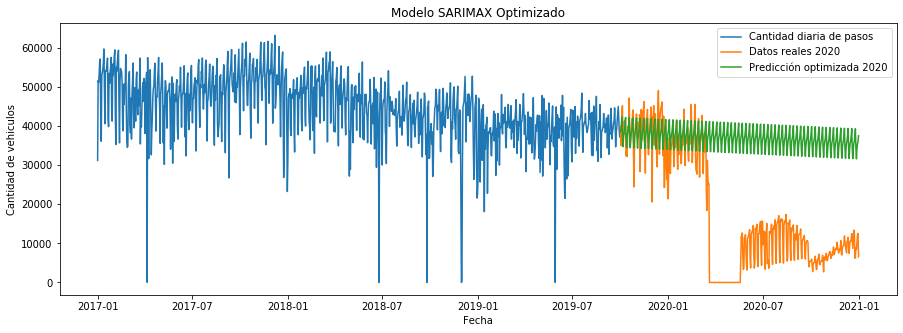

In [107]:
#Graficamos
plt.figure(figsize = (15,5))
plt.plot(train_diario.index, train_diario.cantidad_pasos, label = 'Cantidad diaria de pasos')
plt.plot(test_diario.index,  test_diario.cantidad_pasos,  label = 'Datos reales 2020')
plt.plot(test_diario.index,  sarimax_for_2020, label = 'Predicción optimizada 2020')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX Optimizado")
plt.show()

In [108]:
#Calculo de del RMSE
from sklearn.metrics import mean_squared_error
rmse_sarimax_2020 = np.sqrt(mean_squared_error(test_diario.cantidad_pasos, sarimax_for_2020))
rmse_sarimax_2020

23389.898029529242

Como puede verse el error aumenta ya que la situación pandemia hizo del tráfico impredecible, el RMSE lo refleja.

Ahora vamos a probar incoroporando información del año 2016. Revisaremos los resultados con el modelo Sarimax Optimizado.

In [109]:
#Importamos el ds 2016 y revisamos los valores que traen las columnas estacion y forma de pago
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
print(data_2016['estacion'].unique())
print(data_2016['forma_pago'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


In [110]:
data_2016.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

In [111]:
#Filtramos los datos de análisis
mask = np.logical_and(data_2016.estacion=='Illia', data_2016.forma_pago == 'EFECTIVO')
data_2016 = data_2016[mask]

#Resampleamos para agrupar por día los datos 2016
data_2016['fecha2'] = pd.to_datetime(data_2016.fecha)
data_2016.drop(columns = ['fecha'], inplace = True)
data_2016.rename(columns = {'fecha2':'fecha'}, inplace = True) 

diario_2016 = data_2016.resample('D', on = 'fecha').sum()

#Quitamos las columnas que no vamos a utilizar
diario_2016.drop(columns = ['periodo', 'hora_inicio', 'hora_inicio', 'hora_fin'], inplace = True)
diario_2016

cantidad_pasos
fecha                     
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907
...                    ...
2016-12-27           59662
2016-12-28           60291
2016-12-29           61551
2016-12-30           58601
2016-12-31           31527

[366 rows x 1 columns]

In [112]:
#Concatenamos los data sets
diario_total_2 = pd.concat([diario_171819, diario_2016])
# Reordenamos las fechas
diario_total_2.sort_values('fecha', inplace = True)
diario_total_2

cantidad_pasos
fecha                     
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1461 rows x 1 columns]

**Modelo Sarimax Optimizado con base 2016**

In [113]:
#Separamos el ds en train y test
diario_total_2['fecha_numeros'] = diario_total_2.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train_diario_2 = diario_total_2.loc[diario_total_2.index <= split_date].copy()
test_diario_2  = diario_total_2.loc[diario_total_2.index >  split_date].copy()
train_diario_2.drop(columns = ["fecha_numeros"], inplace = True)

#Generamos el modelo con los mejores hiperparámetros
import statsmodels.api as sm
modelo_2016 = sm.tsa.statespace.SARIMAX(train_diario_2, order = (0,1,0), seasonal_order = (0,1,2,7))
sarimax_model_2016 = modelo_2016.fit()

#Predicimos ultimo trimestre 2019
sarimax_for_2016 = sarimax_model_2016.forecast(steps = (92))
sarimax_for_2016 

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\u533327\Miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2019-10-01    38458.242267
2019-10-02    39074.350453
2019-10-03    40509.230775
2019-10-04    42242.858172
2019-10-05    37349.661163
                  ...     
2019-12-27    41423.883999
2019-12-28    36449.195140
2019-12-29    33971.900326
2019-12-30    36354.677259
2019-12-31    37669.777704
Freq: D, Length: 92, dtype: float64

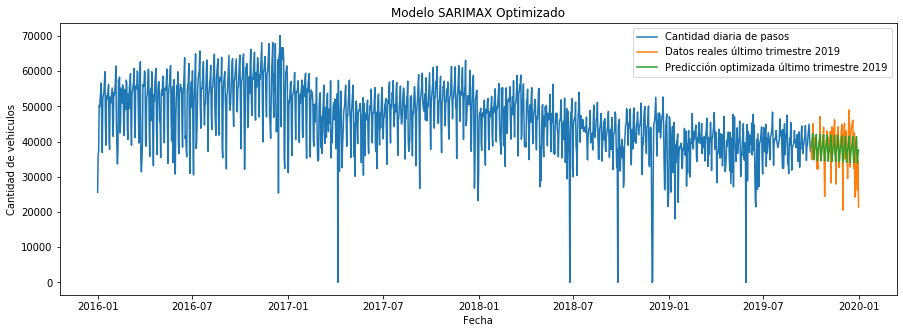

In [114]:
#Graficamos
plt.figure(figsize = (15,5))
plt.plot(train_diario_2.index, train_diario_2.cantidad_pasos, label = 'Cantidad diaria de pasos')
plt.plot(test_diario_2.index, test_diario_2.cantidad_pasos, label = 'Datos reales último trimestre 2019')
plt.plot(test_diario_2.index, sarimax_for_2016, label = 'Predicción optimizada último trimestre 2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX Optimizado")
plt.show()

In [115]:
# Calculamos el RMSE
from sklearn.metrics import mean_squared_error
rmse_sarimax_2016 = np.sqrt(mean_squared_error(test_diario_2.cantidad_pasos, sarimax_for_2016))
rmse_sarimax_2016

5140.636299290161

Si bien el RMSE es óptimo, no superó el RMSE que brindó el modelo optimizado con los datos 2017, 2018 y 2019 (5139.24).

In [116]:
#Resumen de los RMSE por modelo
resumen = {"Modelos":["Benchmark","Regresión Lineal", "ARIMA", "SARIMAX", "SARIMAX OPTIMIZADO 17-18-19", "SARIMAX OPTIMIZADO 16-17-18-19" ],
            "Base":["flujo vehicular 17-18-19","flujo vehicular 17-18-19","flujo vehicular 17-18-19", "flujo vehicular 17-18-19", "flujo vehicular 17-18-19",
                    "flujo vehicular 16-17-18-19"],
            "RMSE-test":[np.round(rmse_bench,2),np.round(rmse_lr,2),np.round(rmse_arima,2),np.round(rmse_sarimax,2),np.round(rmse_sarimax_op,2),
                         np.round(rmse_sarimax_2016,2)]}
pd.DataFrame(resumen)

Modelos                         Base  RMSE-test
0                       Benchmark     flujo vehicular 17-18-19    6949.66
1                Regresión Lineal     flujo vehicular 17-18-19    5804.14
2                           ARIMA     flujo vehicular 17-18-19    8491.24
3                         SARIMAX     flujo vehicular 17-18-19    5882.02
4     SARIMAX OPTIMIZADO 17-18-19     flujo vehicular 17-18-19    5139.25
5  SARIMAX OPTIMIZADO 16-17-18-19  flujo vehicular 16-17-18-19    5140.64

Como puede observarse en el resumen el modelo que mostró mejor performance es SARIMAX Optimizado con las 3 bases del 2017, 2018 y 2019. Lo que sorprende es que una simple regresión lineal obtuvo valores cercanos de RMSE respecto al mejor modelo. Esto me dá la curiosidad de explorar con modelos no exclusivos de series de tiempo.

### Preguntas
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

En el caso de usar SARIMAX creo que sumarizaría la cantidad de pasos de los vehículos por cada uno de los atributos (para cada forma de pago, para cada sentido, día de la semana, etc.) ya que solo nos permite tener en cuenta fecha y cantidad de pasos el modelo. Es un modelo costoso computacionalmente por lo que probablemente elegiria otro tipo que permita considerar mas variables.


2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

In [117]:
#Se analiza el comportamiento de las demas estaciones
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

#Concateno los 3 datasets
estaciones = pd.concat([data_2019, data_2018, data_2017])

#Paso la columna fecha a formato datetime 
estaciones['fecha2'] = pd.to_datetime(dataset.fecha)

#Eliminamos las columnas que no necesito
estaciones.drop(columns=['fecha', 'hora_fin', 'hora_inicio', 'periodo'], inplace = True)

#Cambiamos el nombre de la columna con la fecha
estaciones.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
estaciones.sort_values('fecha', inplace = True)
estaciones.reset_index(drop=True, inplace = True)
estaciones.head()

dia            estacion    sentido tipo_vehiculo  forma_pago  \
0  Domingo               Illia  Provincia       Liviano    TELEPASE   
1  Domingo  Dellepiane Liniers  Provincia       Liviano  NO COBRADO   
2  Domingo  Dellepiane Liniers  Provincia       Liviano    EFECTIVO   
3  Domingo  Dellepiane Liniers  Provincia       Liviano      EXENTO   
4  Domingo  Dellepiane Liniers  Provincia       Liviano    EFECTIVO   

   cantidad_pasos      fecha  
0             368 2017-01-01  
1               2 2017-01-01  
2              19 2017-01-01  
3              10 2017-01-01  
4             786 2017-01-01

In [118]:
#Se agrupa por estación
estaciones_total = estaciones.groupby(["fecha","estacion"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

#Revisamos los nombres de las estaciones
print(estaciones_total['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento' 'Alberti' 'Dellepiane' 'PDB']


In [119]:
#Unificamos los nombres de las estaciones
estaciones_total = estaciones_total.replace({'Dellepiane Centro':'Dellepiane', 'Dellepiane Liniers':'Dellepiane', 'Alberti':'Alberdi'})
print(estaciones_total['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


In [120]:
#Generamos variables para poder visualizar mejor el agrupamiento
año = estaciones_total.fecha.dt.year
mes = estaciones_total.fecha.dt.month

año_mes = pd.DataFrame({'year': año,'month': mes,'day': np.ones(len(año))})
año_mes = pd.to_datetime(año_mes)
#año_mes
estaciones_total['año_mes'] = año_mes

Text(0.5, 1.0, 'Distribución de pasos segun el medio de pago')

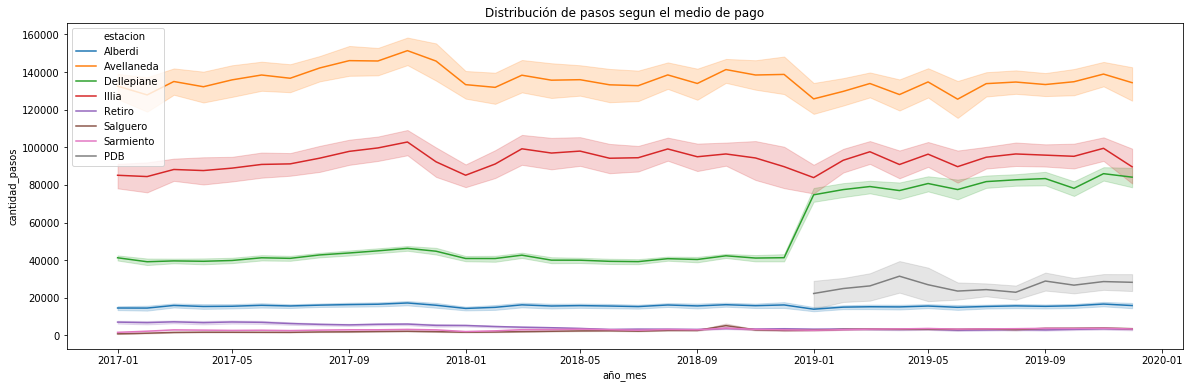

In [121]:
#Graficamos
plt.figure(figsize = (20,6))
sns.lineplot(data = estaciones_total, x='año_mes', y= 'cantidad_pasos', hue = 'estacion')
plt.title('Distribución de pasos segun el medio de pago')

Lo que se puede observar es que tanto Illia como Avellaneda tiene comportamientos muy similares a pesar de que Avellaneda tiene mayor tráfico y es la que presenta mayor cantidad de pasos. El resto de las estaciones no presentan comportamientos similares, al menos en este análisis pre eliminar.
También se visualiza incremento a partir de 12/2018 en la estación Dellepiane, según la investigación realizada puede deberse a que se inauguró el Puente Olímpico Ribera Sur incrementando el tráfico considerablemente, fuente: https://www.buenosaires.gob.ar/desarrollourbano/noticias/puente-olimpico-ribera-sur-un-beneficio-para-300-mil-vehiculos-que .

También se puede concluir que así como algunas estaciones aumentaron su tráfico de vehículos, otras disminuyeron. Las razones pueden ser varias, como por ejemplo que hubieron obras civiles muy grandes durante el periodo analizado que pueden haber impactado en el tránsito de las personas, como también las manifestaciones continuas que se presentaban durante la presidencia de Macri que pueden haber influenciado en el comportamiento de los ciudadanos de Buenos Aires.


3. ¿Hay algo que te gustaría investigar o probar?

Me gustaria intentar con modelos como Árboles de decisión o XGBoots ya que es posible considerar multiples variables a diferencia de los modelos de Series temporales. Considero que las variables feriados, días de los aumentos en las tarifas de los peajes, precio del combustible, entre otros son datos que pueden nutrir al modelo positivamente.

**Git Hub**